In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt

import xspec as xs
xs.Xset.allowPrompting = False #keeps pyxspec from hanging, waiting a response to a prompt
xs.Xset.allowNewAttributes = True

### Using XSPEC:

In [2]:
xs.AllData.clear()
average = xs.Spectrum("bn121225417_LAT-LLE_bkgspectra.bak{1}")
average.response = "bn121225417_LAT-LLE_weightedrsp.rsp"

xs.AllModels.clear()
m=xs.Model("pow")
xs.Fit.perform()

xs.Plot.device="/xs"
xs.Plot.xAxis="MeV"
xs.Plot.add=True
xs.Plot.background=True
xs.Plot.xLog=True
xs.Plot.yLog=True
xs.Plot.show()
xs.Plot("ufspec") # this is unfolded spectrum

x_average_uf= xs.Plot.x(1)
y_average_uf = xs.Plot.y(1)
xErrs_average_uf = xs.Plot.xErr(1)
yErrs_average_uf = xs.Plot.yErr(1)


User entered plot commands:


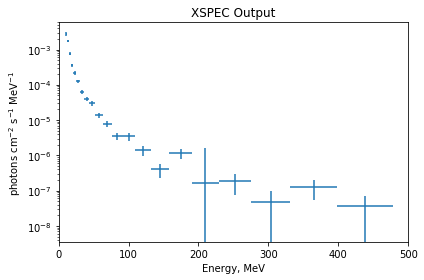

In [3]:
plt.errorbar(x_average_uf, y_average_uf, xerr = xErrs_average_uf, yerr = yErrs_average_uf, ls='none')
plt.ylabel('photons cm$^{-2}$ s$^{-1}$ MeV$^{-1}$ ')
plt.xlabel('Energy, MeV')
plt.yscale('log')
plt.title('XSPEC Output')
plt.xlim(0, 5e2)
plt.tight_layout()
plt.show()

### Using PyFITS

In [4]:
from astropy.io import fits

bkg = fits.open("bn121225417_LAT-LLE_bkgspectra.bak")
bkg_rate = bkg[1].data['RATE'][0,:] # [photons/s]
energy = bkg[2].data # [keV]
energy_mean = ((energy['E_MAX'] + energy['E_MIN']))/2000. # in MeV
E_diff = ((energy['E_MAX'] - energy['E_MIN']))/1000. # bin sizes, in MeV

In [5]:
arf = fits.open("bn121225417_LAT-LLE_weightedrsp.arf")
rmf = fits.open("bn121225417_LAT-LLE_weightedrsp.rmf")
rsp = fits.open("bn121225417_LAT-LLE_weightedrsp.rsp")

eff_area = arf[1].data['SPECRESP'] # effective area 

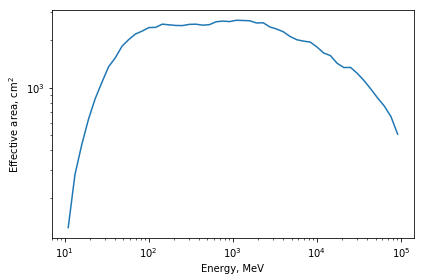

In [6]:
plt.loglog(energy_mean, eff_area)
plt.ylabel('Effective area, cm$^2$')
plt.xlabel('Energy, MeV')
plt.tight_layout()
plt.show()

In [7]:
bkg_uf_fits = bkg_rate/(eff_area*E_diff)

/Users/milena/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


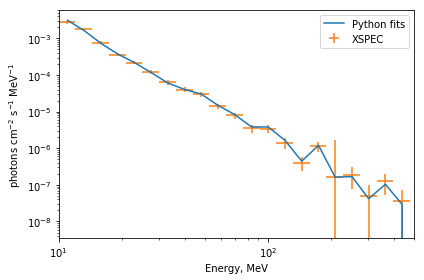

In [8]:
plt.loglog(energy_mean, bkg_uf_fits, label = 'Python fits')
plt.errorbar(x_average_uf, y_average_uf, xerr = xErrs_average_uf, yerr = yErrs_average_uf, ls='none', label = 'XSPEC')
plt.ylabel('photons cm$^{-2}$ s$^{-1}$ MeV$^{-1}$ ')
plt.xlabel('Energy, MeV')
plt.yscale('log')
plt.xlim(0, 5e2)
plt.legend()
plt.tight_layout()
plt.show()